## 가상 데이터를 이용한 알고리즘 구현

#### 환경 구성

In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.metrics import f1_score

#### 가상 데이터 생성

In [37]:
np. random.seed(42)

# 분류용 데이터
X_clf = np.random.rand(100, 5) # 5개의 특성 생성
y_clf = np.random.randint(0, 2, 100) # 0, 1 랜덤하게 100개 생성

# 회귀용 데이터
X_reg = np.random.rand(100, 3)
y_reg = 2 + 3*X_reg[:, 0] + 1.5*X_reg[:, 1] - 2*X_reg[:, 2] + np.random.randn(100)*0.1

#### 데이터 분할


In [38]:
# 분류용 데이터 분할
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# 회귀용 데이터 분할
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [39]:
# 분할한 뒤에는 잘 되었는지 꼭 확인해주자!
X_clf_train.shape, y_clf_train.shape, X_clf_test.shape, y_clf_test.shape

((80, 5), (80,), (20, 5), (20,))

#### Scaling (preprocessing)

In [40]:
#StandardScaler : 평균=0, 표준편차=1로 조정해서 모든 특성이 같은 크기를 가지게 함
#정답값 (test데이터. 여기서는 y=어쩌고 데이터들)은 가공하지 않는다!
scaler = StandardScaler()

X_clf_train_scaled = scaler.fit_transform(X_clf_train)
X_clf_test_scaled = scaler.fit_transform(X_clf_test)
X_reg_train_scaled = scaler.fit_transform(X_reg_train)
X_reg_test_scaled = scaler.fit_transform(X_reg_test)

#### Modeling

##### KNN

In [41]:
#n_neighbors 값은 주로 홀수 지정
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_clf_train_scaled, y_clf_train)


KNeighborsClassifier(n_neighbors=3)

In [42]:
knn_pred = knn.predict(X_clf_test_scaled)
print(f"KNN Accuracy : {accuracy_score (y_clf_test, knn_pred)}")

KNN Accuracy : 0.45


##### SVM

In [43]:
svm = SVC(kernel='rbf', random_state=42) #뼈대 세우기
svm.fit(X_clf_train_scaled, y_clf_train) #데이터 집어넣어 훈련
svm_pred = svm.predict(X_clf_test_scaled)
print(f"SVC Accuracy: {accuracy_score(y_clf_test, svm_pred)}")
print(f"SVC F1-Score: {f1_score(y_clf_test, svm_pred)}")

SVC Accuracy: 0.5
SVC F1-Score: 0.0


##### DeCision Tree

In [44]:
# DC Tree
tree = DecisionTreeClassifier(random_state=42) #뼈대 세우기
tree.fit(X_clf_train_scaled, y_clf_train) #데이터 집어넣어 훈련
tree_pred = tree.predict(X_clf_test_scaled)
print(f"DC Tree Accuracy: {accuracy_score(y_clf_test, tree_pred)}")
print(f"DC Tree F1-Score: {f1_score(y_clf_test, tree_pred)}")

DC Tree Accuracy: 0.55
DC Tree F1-Score: 0.4


### Visualizing

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.inspection import PartialDependenceDisplay

In [46]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    plt.show()

def plot_roc_curve(y_true, y_pred_proba, title):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

##### KNN

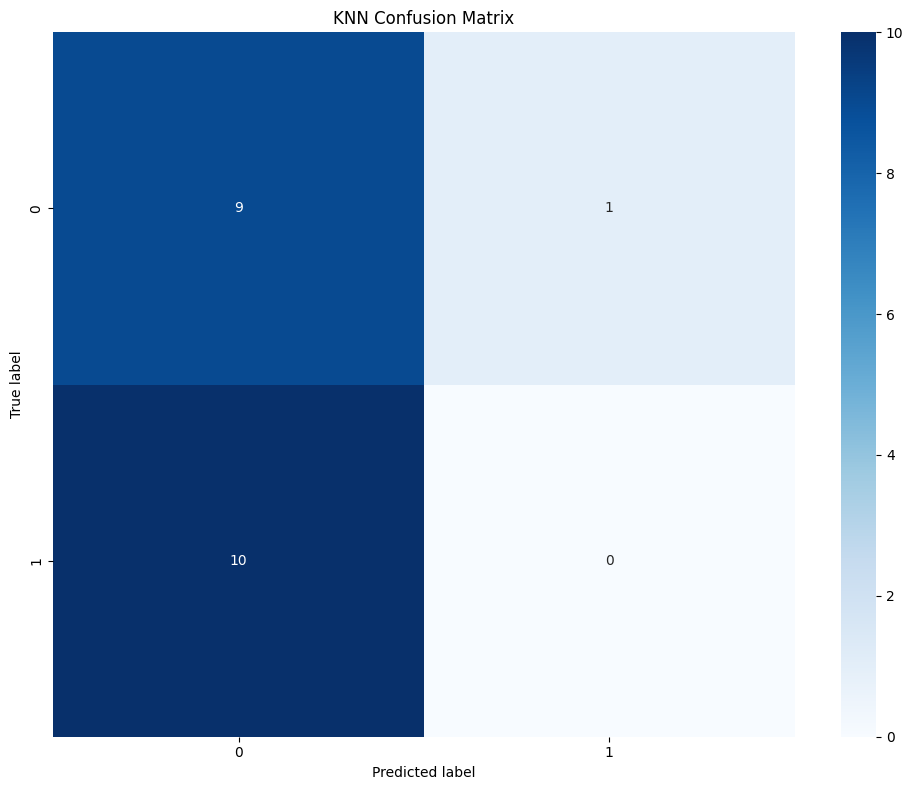

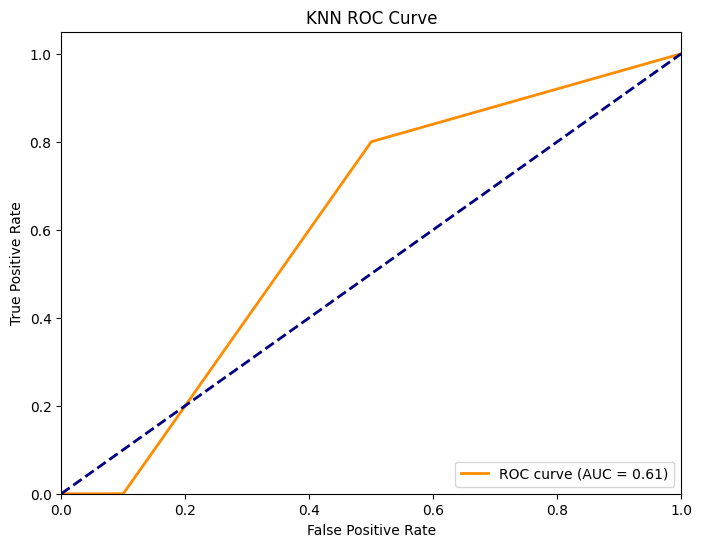

In [47]:
plot_confusion_matrix(y_clf_test, knn_pred, "KNN Confusion Matrix")
plot_roc_curve(y_clf_test, knn.predict_proba(X_clf_test_scaled)[:,1],"KNN ROC Curve")

##### SVM

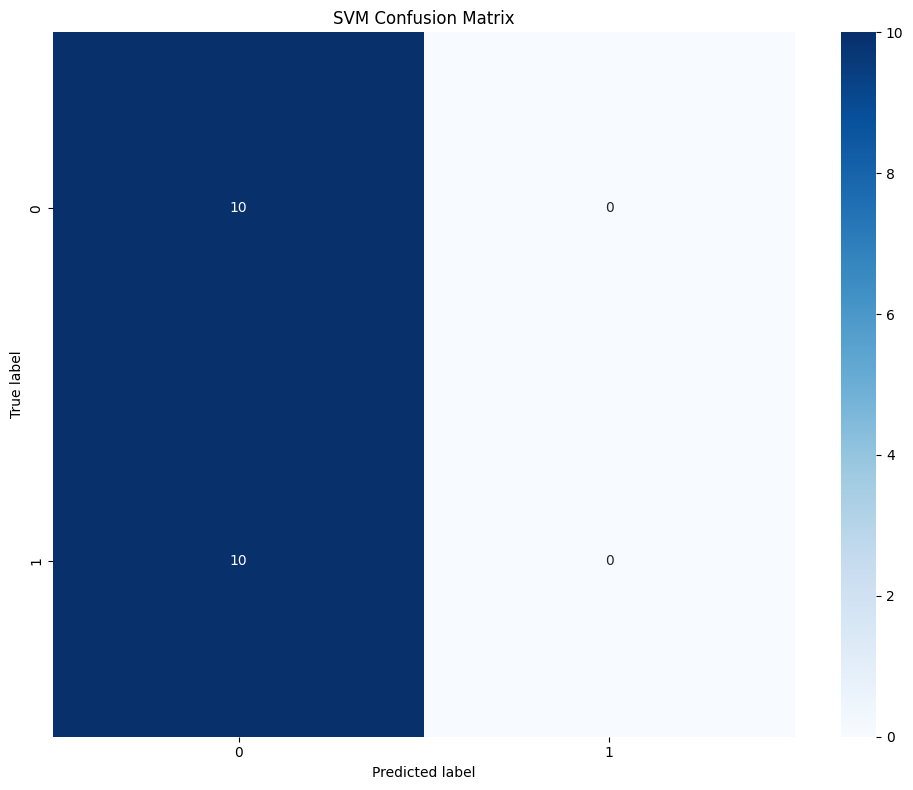

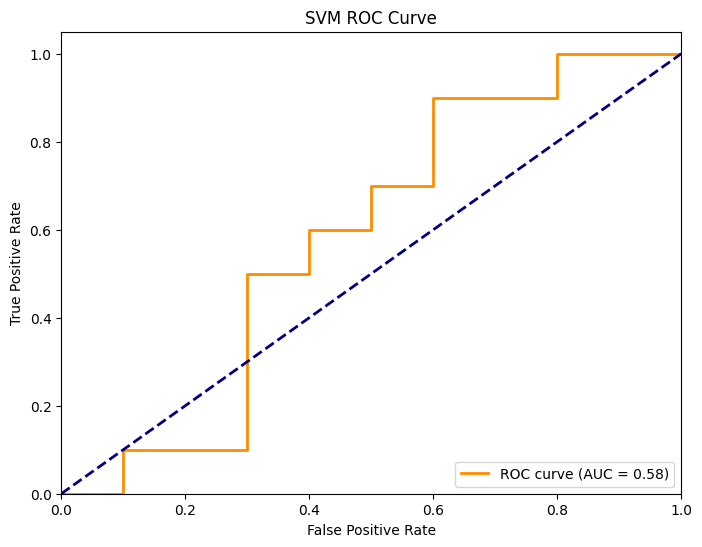

In [48]:
plot_confusion_matrix(y_clf_test, svm_pred, 'SVM Confusion Matrix')
plot_roc_curve(y_clf_test, svm.decision_function(X_clf_test_scaled), 'SVM ROC Curve')

##### Decision Tree

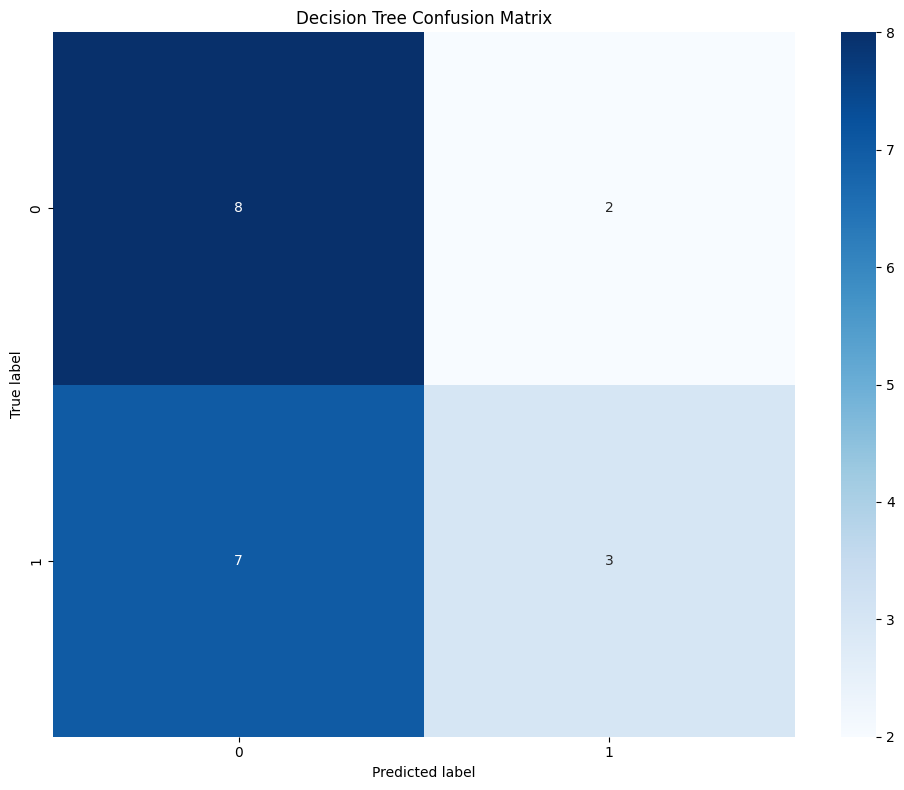

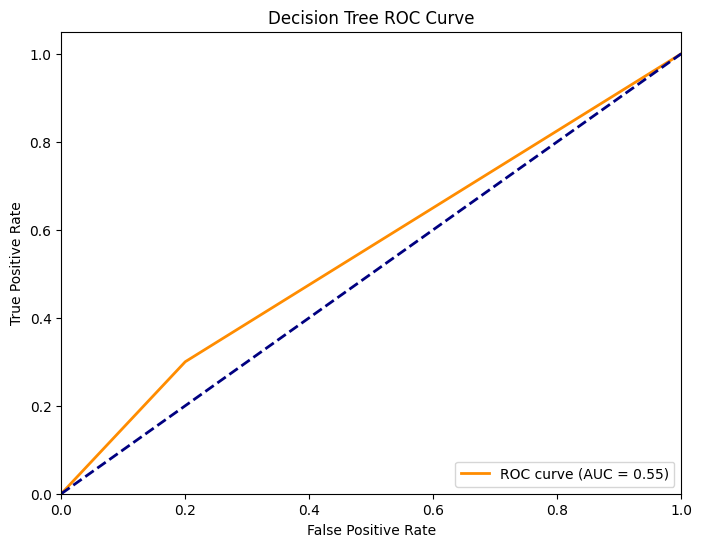

In [49]:
plot_confusion_matrix(y_clf_test, tree_pred, 'Decision Tree Confusion Matrix')
plot_roc_curve(y_clf_test, tree.predict_proba(X_clf_test_scaled)[:, 1], 'Decision Tree ROC Curve')

### Regression

#### SVR

In [50]:
svr = SVR(kernel='rbf') #뼈대 구축
svr.fit(X_reg_train_scaled, y_reg_train) #데이터 넣고 훈련
svr_pred = svr.predict(X_reg_test_scaled) 
print(f"SVR R2 Score: {r2_score(y_reg_test, svr_pred)}")

SVR R2 Score: 0.9290963830420252


#### Linear, Polynomial
선형 회귀, 다항 회귀

In [51]:
lr = LinearRegression()
lr.fit(X_reg_train_scaled, y_reg_train)
lr_pred = lr.predict(X_reg_test_scaled)

poly = PolynomialFeatures(degree=2)
X_reg_train_poly = poly.fit_transform(X_reg_train_scaled)
X_reg_test_poly = poly.fit_transform(X_reg_test_scaled)
pr = LinearRegression()
pr.fit(X_reg_train_poly, y_reg_train)
pr_pred = pr.predict(X_reg_test_poly)

print(f"Linear Reg. R2: {r2_score(y_reg_test, lr_pred)}")
print(f"Poly Reg. R2: {r2_score(y_reg_test, pr_pred)}")

Linear Reg. R2: 0.9308795762983795
Poly Reg. R2: 0.9308324600121196


#### Ridge, Lasso, ElasticNet 

In [52]:
# Ridge, Lasso, EN
ridge = Ridge(alpha=1.)
ridge.fit(X_reg_train_scaled, y_reg_train)
ridge_pred = ridge.predict(X_reg_test_scaled)
print(f"Ridge R2 Score : {r2_score(y_reg_test, ridge_pred)}")

lasso = Lasso (alpha=1.)
lasso.fit(X_reg_train_scaled, y_reg_train)
lasso_pred = lasso.predict(X_reg_test_scaled)
print(f"Lasso R2 Score : {r2_score(y_reg_test, lasso_pred)}")

elastic = ElasticNet(alpha=1., l1_ratio=0.)
elastic.fit(X_reg_train_scaled, y_reg_train)
elastic_pred = elastic.predict(X_reg_test_scaled)
print(f"Elastic R2 Score : {r2_score(y_reg_test, elastic_pred)}")

# 셋을 세트로 적어놓고, 어떤 것이 좋은지?

Ridge R2 Score : 0.9302700662129618
Lasso R2 Score : -0.04424588781548788
Elastic R2 Score : 0.7224238480722882


### Visualizing

In [53]:
def plot_residuals(y_true, y_pred, title):
    residuals = y_true - y_pred # 오차 계산
    plt.figure(figsize=(8, 6)) 
    plt.scatter(y_pred, residuals)
    plt.xlabel('Predicted values') #축에 이름 부여
    plt.ylabel('Residuals')
    plt.title(title) #제목
    plt.axhline(y=0, color='r', linestyle='--') #색과 라인
    plt.tight_layout() #여백
    plt.show() #출력

def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2) #lw = 두께
    plt.xlabel('True values')
    plt.ylabel('Predicted values')
    plt.title(title)
    plt.tight_layout()
    plt.show()

##### SVR

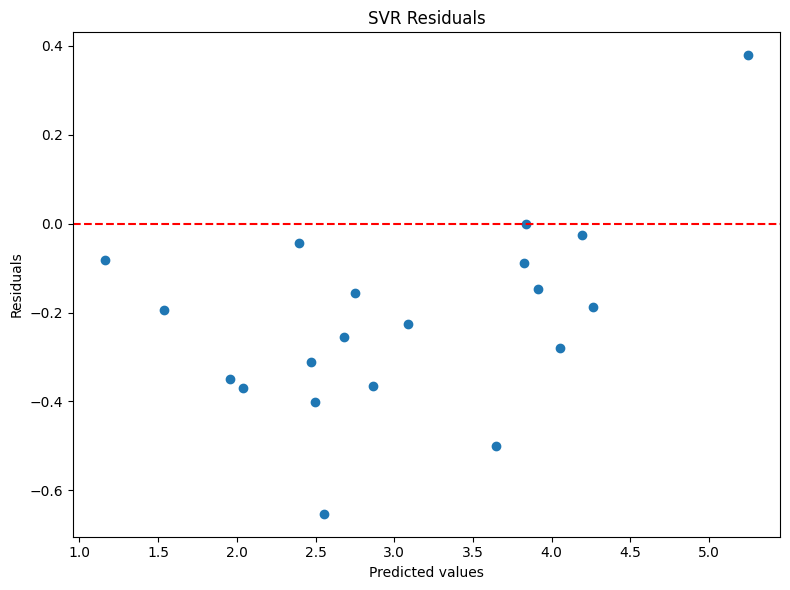

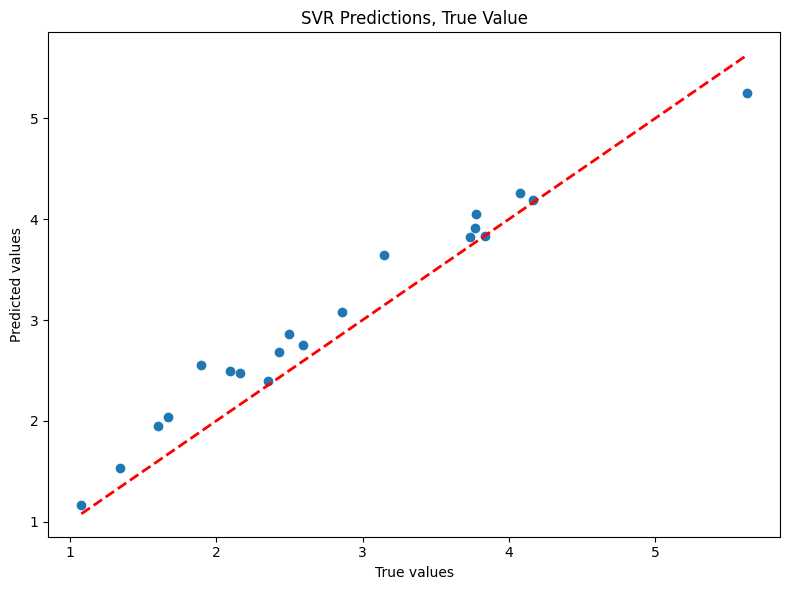

In [54]:
plot_residuals(y_reg_test, svr_pred, "SVR Residuals")
plot_predictions(y_reg_test, svr_pred, "SVR Predictions, True Value")
#선이 회귀방정식, 점이 정답값

#### Feature importance
- 모델을 한 번 돌린 후 중요 특성 파악 가능

<function matplotlib.pyplot.show(close=None, block=None)>

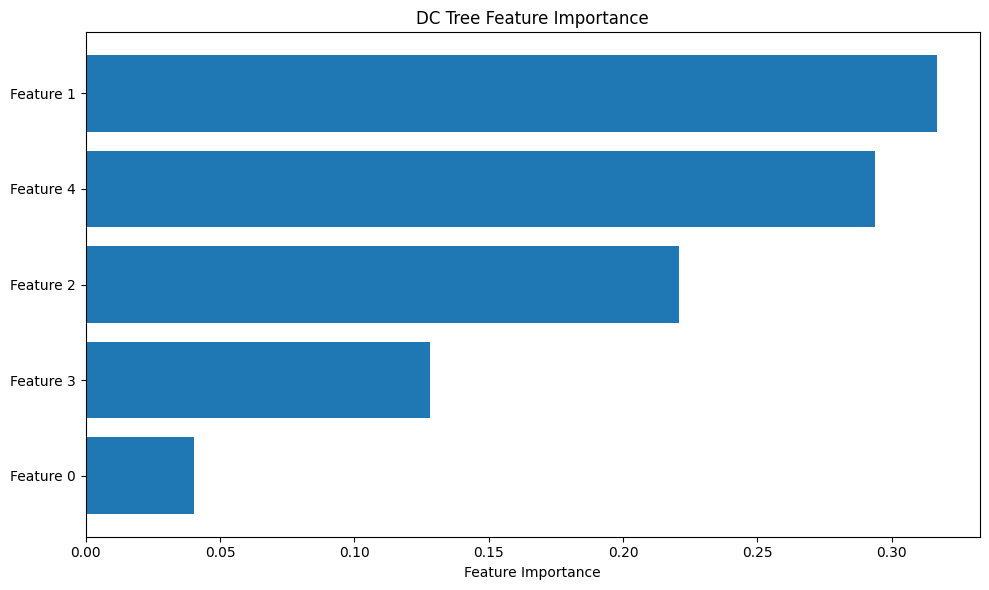

In [55]:
plt.figure(figsize=(10,6))
feature_importance = tree.feature_importances_
feature_names = [f'Feature {i}' for i in range(X_clf.shape[1])]
sorted_idx = np.argsort(feature_importance) #정렬
pos = np.arange(sorted_idx.shape[0]) + 0.5

plt.barh(pos, feature_importance[sorted_idx], align = 'center')
plt.yticks(pos, np.array(feature_names)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('DC Tree Feature Importance')
plt.tight_layout()
plt.show

## 실제 데이터를 이용한 알고리즘 구현

#### 환경구성

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, SVR
from sklearn.tree  import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, confusion_matrix, roc_curve, auc
from sklearn.inspection import PartialDependenceDisplay

#### 데이터 로드

In [57]:
data = load_breast_cancer()
X = data.data
y = data.target

In [58]:
feature_names = data.feature_names

In [59]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

#### Scaling

In [60]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### Modeling (Classification)

In [61]:
def train_and_pred(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.3f}")
    return model, y_pred

##### KNN

In [62]:
knn, knn_pred = train_and_pred(KNeighborsClassifier(n_neighbors=5, ), X_train_scaled, X_test_scaled, y_train, y_test, "KNN")

KNN Accuracy: 0.956


##### SVC

In [63]:
svc, svc_pred = train_and_pred(SVC(kernel = 'rbf', C=1.,), X_train_scaled, X_test_scaled,y_train,y_test, "SVC")

SVC Accuracy: 0.982


##### Decision Tree

In [64]:
tree, tree_pred = train_and_pred(DecisionTreeClassifier(random_state=42), X_train_scaled, X_test_scaled, y_train, y_test, "DC Tree")

DC Tree Accuracy: 0.921


#### Visualization

In [65]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    plt.show()

def plot_roc_curve(y_true, y_pred_proba, title):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

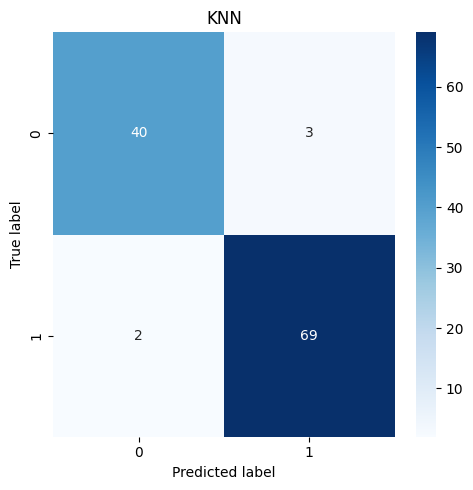

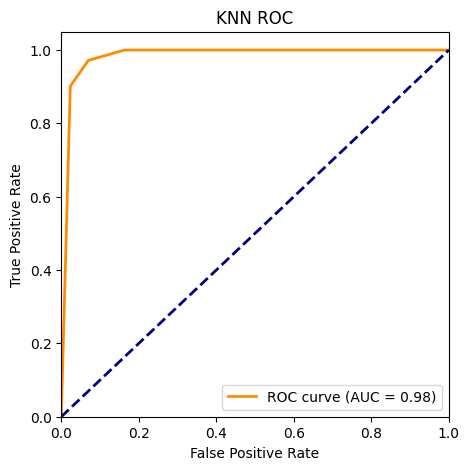

In [66]:
# KNN 시각화
plot_confusion_matrix(y_test, knn_pred, "KNN")
plot_roc_curve(y_test, knn.predict_proba(X_test_scaled)[:, 1], "KNN ROC")

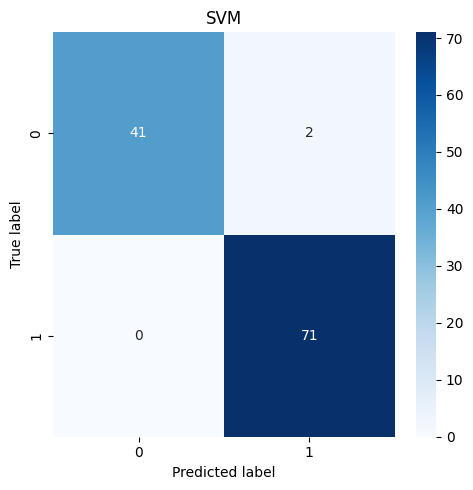

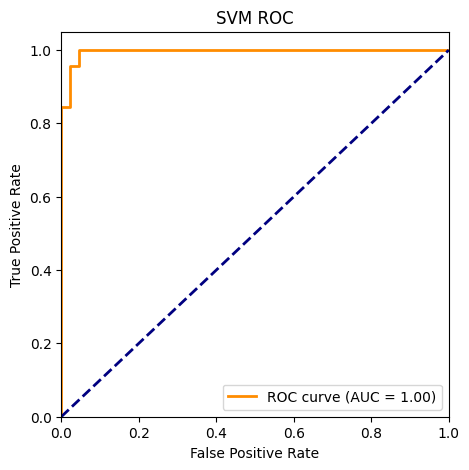

In [67]:
# SVM 시각화
plot_confusion_matrix(y_test, svc_pred, "SVM")
plot_roc_curve(y_test, svc.decision_function(X_test_scaled), "SVM ROC")

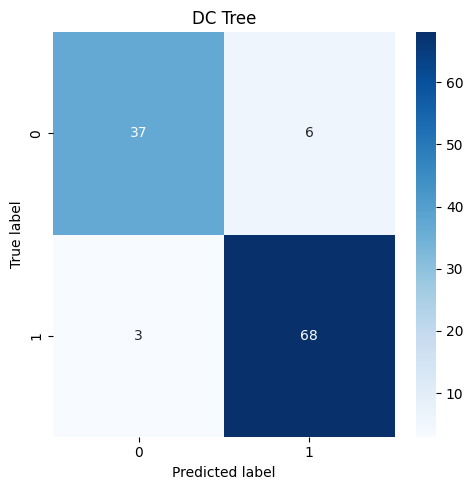

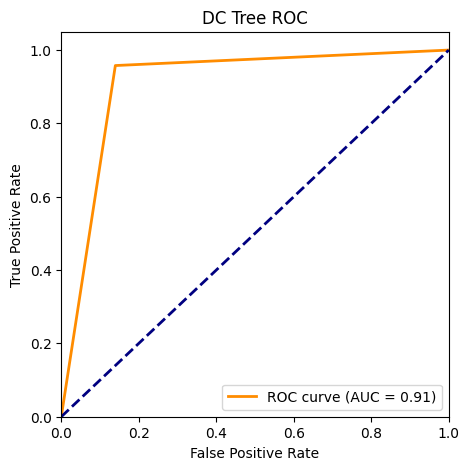

In [68]:
# DC Tree 시각화
plot_confusion_matrix(y_test, tree_pred, "DC Tree")
plot_roc_curve(y_test, tree.predict_proba(X_test_scaled)[:, 1], "DC Tree ROC")

#### Feature importance

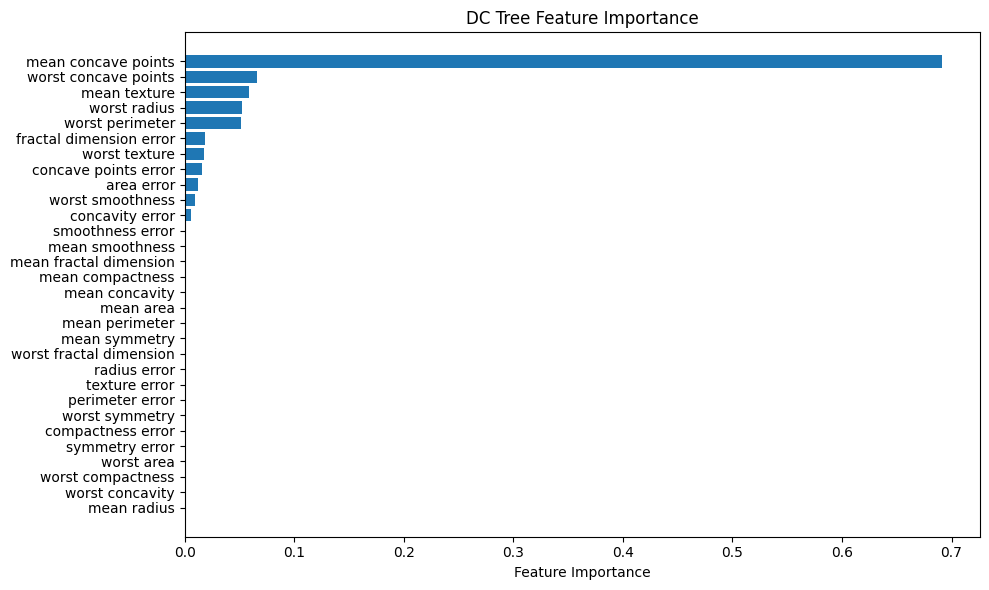

In [69]:
# Decision Tree FI
plt.figure(figsize=(10, 6))
feature_importance = tree.feature_importances_
# feature_names = [f'Feature {i}' for i in range(X_clf.shape[1])]
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(feature_names)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('DC Tree Feature Importance')
plt.tight_layout()
plt.show()

# FI 확인 후 의미 없는 값들은 없애버려도 된다는 판단 가능

### Regression

##### Mean Radius

In [70]:
y_reg = X[:, 0]
X_reg = X[:, 1:]

X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=.2, random_state=42)

X_reg_train_scaled = scaler.fit_transform(X_reg_train)
X_reg_test_scaled = scaler.fit_transform(X_reg_test)

In [72]:
def train_and_reg_pred(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} MSE: {mse}, R2: {r2}")
    return model, y_pred

##### Linear reg

In [73]:
lr, lr_pred = train_and_reg_pred(LinearRegression(), X_reg_train_scaled, X_reg_test_scaled, y_reg_train, y_reg_test, "Linear Reg.")

Linear Reg. MSE: 0.008584034888224495, R2: 0.999289768091084


##### Elastic Net

In [74]:
elastic, elastic_pred = train_and_reg_pred(ElasticNet(alpha=1., l1_ratio=0.1), X_reg_train_scaled, X_reg_test_scaled, y_reg_train, y_reg_test, "ElasticNet Reg.")

ElasticNet Reg. MSE: 0.47333355871230276, R2: 0.9608369954997058


#### Visualization

In [75]:
def plot_residuals(y_true, y_pred, title):
    residuals = y_true - y_pred # 오차 계산
    plt.figure(figsize=(5, 5))
    plt.scatter(y_pred, residuals)
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.title(title)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.tight_layout()
    plt.show()

def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(5, 5))
    plt.scatter(y_true, y_pred)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('True values')
    plt.ylabel('Predicted values')
    plt.title(title)
    plt.tight_layout()
    plt.show()

##### Linear Regression

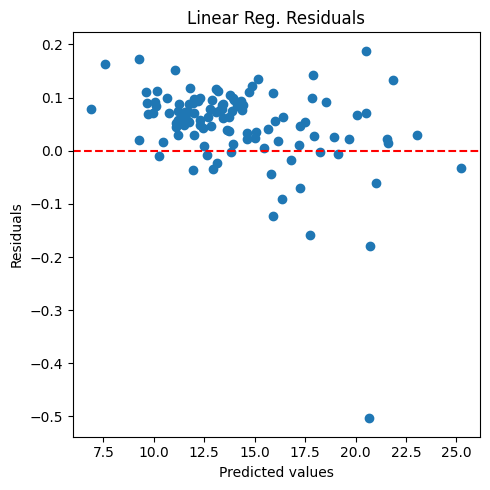

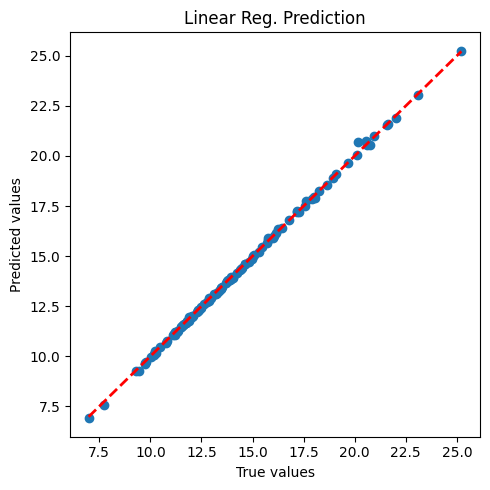

In [76]:
plot_residuals(y_reg_test, lr_pred, "Linear Reg. Residuals")
plot_predictions(y_reg_test, lr_pred, "Linear Reg. Prediction")

##### Elastic Net Regression

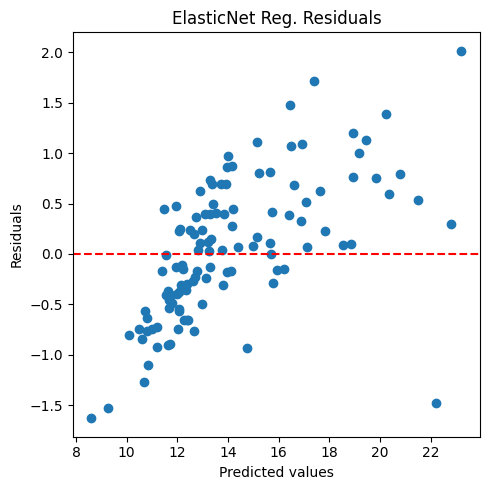

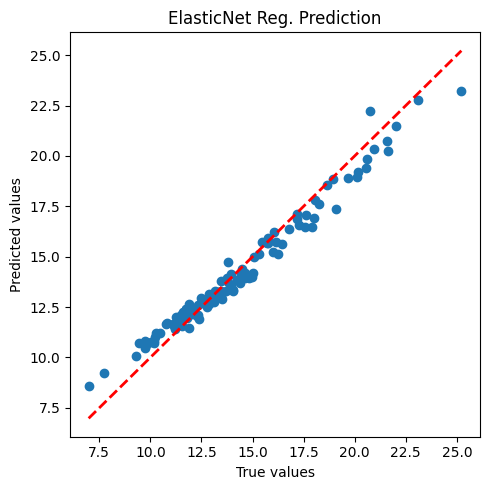

In [77]:
plot_residuals(y_reg_test, elastic_pred, "ElasticNet Reg. Residuals")
plot_predictions(y_reg_test, elastic_pred, "ElasticNet Reg. Prediction")

### Random Forest

In [79]:
from sklearn.metrics import recall_score, precision_score, f1_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

In [81]:
def get_score(y_true, y_pred):
    print(f"잘못 분류한 샘플 개수: {(y_true != y_pred).sum()}")
    print(f"정확도: {accuracy_score(y_true, y_pred):.3f}")
    print(f"Recall: {recall_score(y_true, y_pred):.3f}")
    print(f"Precision: {precision_score(y_true, y_pred):.3f}")
    print(f"F1 Score: {f1_score(y_true=y_test, y_pred=y_pred):.3f}")

In [83]:
# 숲을 이루는 나무를 200개 생성
forest = RandomForestClassifier(max_depth=5, n_estimators=200)
forest.fit(X_train_scaled, y_train)
forest_pred = forest.predict(X_test_scaled)

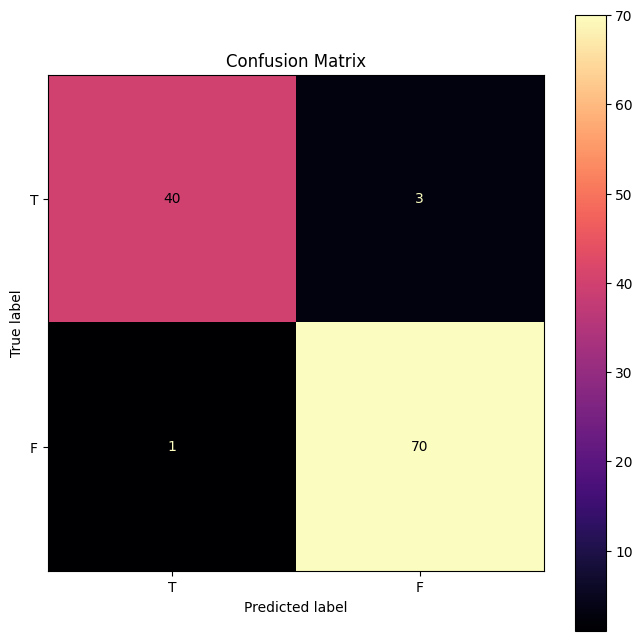

In [86]:
fig, ax = plt. subplots(1, 1, figsize =(8, 8))
ax.set_title('Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(y_test,forest_pred,ax=ax, display_labels='TF', cmap='magma')

In [1]:
# Randomforest 모델의 param. 확인. (내가 세팅할 수 있는 값)
list(forest.get_params().keys())

NameError: name 'forest' is not defined

### Grid Search
하나하나 수정하기 힘드니 한번에 돌릴 수 있는 grid search 사용

In [91]:
from sklearn.model_selection import GridSearchCV

param = {
    'max_depth':[i for i in range(5, 11)],
    'n_estimators':[400, 500, 600]
}

grid = GridSearchCV(estimator=forest,
                    param_grid=param,
                    cv=10,
                    scoring='roc_auc')

grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=5, n_estimators=200),
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10],
                         'n_estimators': [400, 500, 600]},
             scoring='roc_auc')

In [92]:
#optimal param (최적의 파라미터)
print(f"Optimal Param : {grid.best_params_}")
print(f"AUC : {grid.best_score_}")

Optimal Param : {'max_depth': 6, 'n_estimators': 400}
AUC : 0.9904755867864387


In [94]:
# Random Forest 모델이 가장 좋다고 했으니, 나무의 개수를 더 늘려서 학습 진행
forest = RandomForestClassifier(max_depth=5, n_estimators=500)
forest.fit(X_train_scaled, y_train)
forest_pred = forest.predict(X_test_scaled)

In [95]:
get_score(y_test, forest_pred)

잘못 분류한 샘플 개수: 4
정확도: 0.965
Recall: 0.986
Precision: 0.959
F1 Score: 0.972


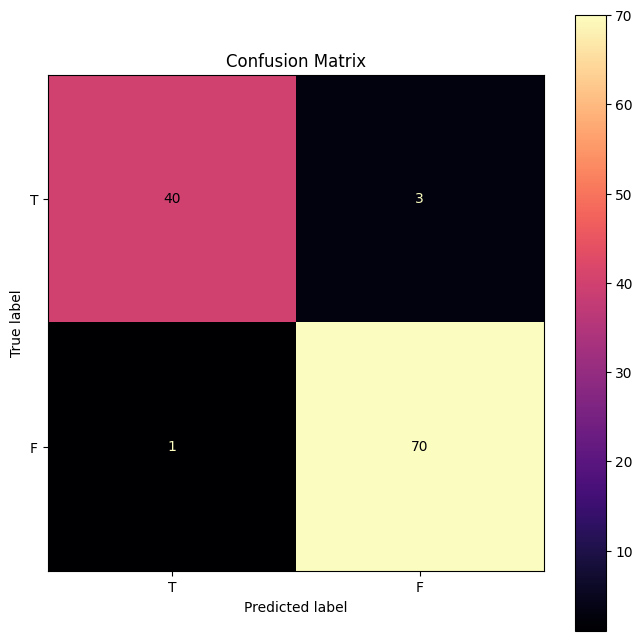

In [96]:
# Confusion Matrix 생성
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_title('Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(y_test, forest_pred, ax=ax, display_labels='TF', cmap='magma')


### XGBoost
현재 사용중인 맥os에서 구동되지 않는 것 같음.

In [ ]:
%pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgbc = XGBClassifier(n_estimator=500, random_state=42)
xgbc.fit(X_train_scaled, y_train)
xgbc_pred = xgbc.predict(X_test_scaled)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.set_title('Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(y_test,forest_pred, ax=ax, display_labels='TF', cmap='magma')